In [15]:
### Import libraries ###
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

#  Runge-Kutta Methods

This notebook is dedicated to the solution of ordinary differential equations of the form:

$$ \frac{dy}{dx} = f(x,y) $$

We can "solve" this differntial equation with iteslf, using a simple approach:

$$ New \;\; value = past \;\; value + \;\; slope * step $$

We can write this as :

$$ y_{i+1} = y_i + \phi h $$

According to this equation the slope $ \phi $ is used in order to extaploate from a past value $y_i$  to a new value $y_{i+1}$ with a step size $h$. All one-step methods that are expressed in this general form only  differ in the way the slope is estimated. All of these techniques are generally known as Runge-Kutta methods.
 
## 1 Euler's method: 
The first derivative gives a direct estimate of the slope at xi 

$$\phi  = f(x_i,y_i)$$

Where $ f(x_i,y_i)$ is the differential equation evaluated at $ x_i $ and $ y_i $. 

$$ y_{i+1} = y_i + f(x_i,y_i) h $$

**Example:** With Euler's method integrate numerically the following equation:
$ \frac{dy}{dx}=-2x^3 + 12x^2 -20x +8.5 $ from $x=0$ to $x=4$ with a fixed step of $0.5$. Intial conditions are as follows: $x=0$ and $y=1$ 

take in mind that the real solution is 
$$ \int{dy}=\int{(-2x^3 + 12x^2 -20x +8.5)dx} $$

$$ y = -0.5x^4 + 4x^3 -10x^2 +8.5x $$

$$ y = -0.5x^4 + 4x^3 -10x^2 +8.5x + C $$

This is a n-parametric family of solutions, in order to obtain a specific solution lets evalaute the funtion in the inital conditions $x=0$ and $y=1$ 

$$ 1 = -0.5(0)^4 + 4(0)^3 -10(0)^2 +8.5(0) + C $$

$  C=1 $ Therefore the solution is: 

$$ y=-0.5x^4+4x^3-10x^2+8.5x+1 $$

In [16]:
def eulers_method(dy_dx,yi,xi,h,a,b):
    i = a  # initial interval
    j=0    # Counter 
    x=xi   # Set x to intial condition
    y_i_1=yi # set y to intial conditon
    x_vec = [] # create a vector to store values
    y_vec = [] # cfreate a vector to store values
    while i <= b:
        x_vec.append(x)
        y_vec.append(y_i_1)

        phi = dy_dx(x)           # Evaluate derivative in x 
        y_i_1 = y_vec[j] + phi*h # Get next y point
        i =i+h                   # Increment x 
        x=i
        j+=1
    return  y_vec,x_vec
    
### Example ###
dy_dx = lambda x: -2*x**3 + 12*x**2 - 20*x +  8.5
h=0.5
xi=0
yi=1
a=0
b=4
y,x= eulers_method(dy_dx,yi,xi,h,a,b)
print(y)

[1, 5.25, 5.875, 5.125, 4.5, 4.75, 5.875, 7.125, 7.0]


In [17]:
### Optimize memory using numpy arrays ###
def eulers_method_v2(dy_dx,yi,xi,a,b,h):
    """Euler Method"""
    vector_size = (b-a)/h + 1               # Create a constant to  generate a vector, add 1 extra step for initial condition
    x_vec = np.array([i*h for i in range(0,int(vector_size))])  # Create numpy array from 0  to number of vector size
    x_vec = x_vec + xi                                          # slide to xi 
    y_vec =  np.zeros((int(vector_size),))                      # Create a vector of zeros
    y_vec[0] = yi                                               # append initial condition of y 
    
    ### Iterate over the vectors ###
    for i in range(0,int(vector_size)-1):                            
        phi = dy_dx(x_vec[i],y_vec[i])                        # Evaluate derivative in x 
        y_vec[i+1]= y_vec[i] + phi*h                          # Get next y point and append it to y_vec
                                                        
    return y_vec,x_vec


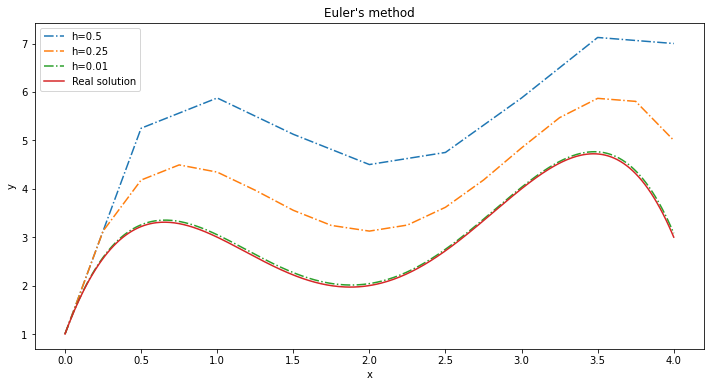

In [18]:
### Differential Equation ###
dy_dx = lambda x,y: -2*x**3 + 12*x**2 - 20*x +  8.5
# Notice that we define a lambda expression for x,y though y is not used. This is onle done since the function for Euler's
# Method expects a differential equation in terms of y and x. 

#############################

### Euler method h=0.5 ###
y_5,x_5= eulers_method_v2(dy_dx,yi=1,xi=0,a=0,b=4,h=0.5)
##########################

### Euler method h=0.25 ###
y_25,x_25= eulers_method_v2(dy_dx,yi=1,xi=0,a=0,b=4,h=0.25)
##########################

### Euler method h=0.1###
y_01,x_01= eulers_method_v2(dy_dx,yi=1,xi=0,a=0,b=4,h=0.01)
##########################

### REAL SOLUTION ###
y_real = lambda x: -0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1
y_real_vec = y_real(x_01)
#####################

### PLOT ###
plt.figure(figsize=(12,6))
plt.plot(x_5,y_5,label="h=0.5",linestyle="-.")
plt.plot(x_25,y_25,label="h=0.25",linestyle="-.")
plt.plot(x_01,y_01,label="h=0.01",linestyle="-.")
plt.plot(x_01,y_real_vec,label ="Real solution")

#### Make Plot Pretty ###
plt.title("Euler's method")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

KEEP IN MIND THAT THESE PLOTS ARE THE "ESTIMATED" SOLUTION (numerical integration of the differential equation), If you wish you can also  plot the  differential equation:

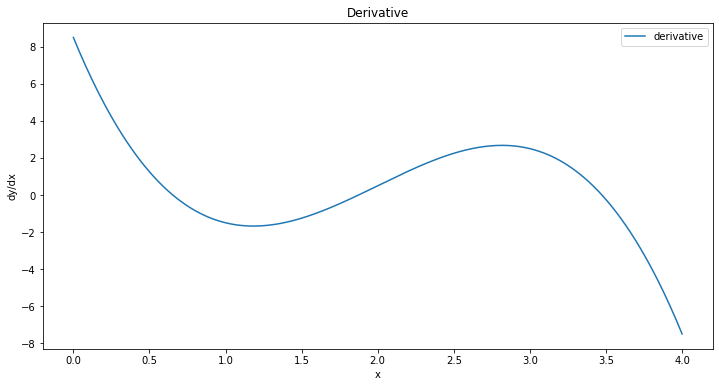

In [19]:
### PLOT ###
plt.figure(figsize=(12,6))
plt.plot(x_01,dy_dx (x_01,y_real),label ="derivative")

#### Make Plot Pretty ###
plt.title("Derivative")
plt.xlabel("x")
plt.ylabel("dy/dx")
plt.legend()
plt.show()

## 2.- Huen's Method (Euler's Method improved):
One method to improve the estimation of the slope employs the determination of two
derivatives in the interval (one at the start point and one at the end). The two derivatives are  then averaged in order to obtain a better estimate of the slope in the entire interval. This procedure, known as Heun's method:

Remeber that in Euler's method we degine the slope as:
$$  y_{i}^{'} = f(x_i,y_i)$$

We use this solpe in  orde to interpolate the next value for y

$$ y_{i+1}^0 = y_i + f(x_i,y_i) h $$

In the standard Euler method we stop here. However, in Heun's method
the $ y_{i+1}^0 $  calculated in the las equation is not the final answer, but an intermediate prediction. Therefore, we distinguish it with a superscript 0. Given an estimate of $y_{i + 1}$ that
allows the calculation of an estimate of the slope at the end of the interval:

$$ y'_{i+1} = f(x_{i+1},y_{i+1}^0) $$

Thus, the two slopes are combined to obtain a
average slope in the interval:

$$ \phi = \bar{y} = \frac{y_i^{'} + y_{i+1}^{'}}{2} =  \frac{  f(x_{i},y_{i}) +f(x_{i+1},y_{i+1}^0)}{2}$$

Therefore we obtain the next point of $y$ as:

$$ y_{i+1} = y_i + \phi h $$

$$ y_{i+1} = y_i + \frac{  f(x_{i},y_{i}) +f(x_{i+1},y_{i+1}^0)}{2} h $$


**Example:** With Huen's method integrate numerically the following equation:
$ \frac{dy}{dx} = 4e^{0.8x} - 0.5y $ from $x=0$ to $x=2$ with a fixed step of $1$. Intial conditions are as follows: $x=0$ and $y=1$ 

take in mind that the real solution is 
$$ \int{\frac{dy}{-0.5y}}=\int{(4e^{0.8x})dx} $$

$$ \frac{-2}{ln|y|} = 5e^{0.8x} + C$$

$$ \frac{ln|y|}{-2} = \frac{1}{5}e^{-0.8x} + C$$

$$ ln|y| = \frac{-2}{5}e^{-0.8x} + C$$

$$ y = e^{\frac{-2}{5}e^{-0.8x} + C}$$

$$ y = e^Ce^{\frac{-2}{5}e^{-0.8x}}$$

$$ y = Ce^{\frac{-2}{5}e^{-0.8x}}$$
This is a n-parametric family of solutions, in order to obtain a specific solution lets evalaute the funtion in the inital conditions $x=0$ and $y=2$ 

$$ y=\frac{4}{1.3} (e^{0.8x} - e^{0.5x}) + 2e^{-0.5x}$$

In [20]:
### Optimize memory using numpy arrays ###
def huen_method_v2(dy_dx,yi,xi,a,b,h):
    """ Huen Method"""
    vector_size = (b-a)/h + 1               # Create a constant to  generate a vector, add 1 extra step for initial condition
    x_vec = np.array([i*h for i in range(0,int(vector_size))])  # Create numpy array from 0  to number of vector size
    x_vec = x_vec + xi                                          # slide to xi 
    y_vec =  np.zeros((int(vector_size),))                      # Create a vector of zeros
    y_vec[0] = yi                                               # append initial condition of y
    
    ### Iterate over the vectors ###
    for i in range(0,int(vector_size)-1):                            
        phi_1 = dy_dx(x_vec[i],y_vec[i])                        # Evaluate derivative in x 
        y0_i1 = y_vec[i] + phi_1*h                              # First estimated value for next y
        phi_2 = dy_dx(x_vec[i+1],y0_i1)                         # Uses the estimation to calculate future derivaitve
        phi_average = (phi_1 + phi_2)/2
        y_vec[i+1]= y_vec[i] + phi_average*h                   # Get next y point and append it to y_vec
                                                      
    return y_vec,x_vec

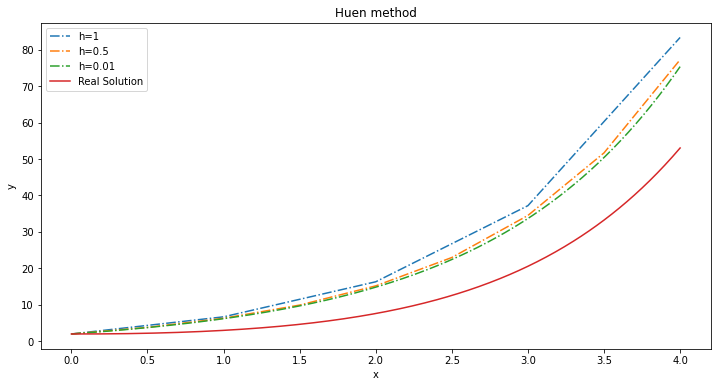

In [21]:
dy_dx = lambda x,y: 4*np.exp(0.8*x) - 0.5*y   # differential equation
y_real = lambda x: (4/1.3)*(np.exp(0.8*x)-np.exp(0.5*x)) + 2*np.exp(-0.5*x) # Real solution 

### Huen h=1 ###
y_1,x_1 = huen_method_v2(dy_dx,yi=2,xi=0,a=0,b=4,h=1)
################

### Huen h=0.5 ###
y_05,x_05 = huen_method_v2(dy_dx,yi=2,xi=0,a=0,b=4,h=0.5)
#################

### Huen h=0.1###
y_01,x_01 = huen_method_v2(dy_dx,yi=2,xi=0,a=0,b=4,h=0.01)
################

### PLOT ###
plt.figure(figsize=(12,6))
plt.plot(x_1,y_1,label="h=1",linestyle="-.")
plt.plot(x_05,y_05,label="h=0.5",linestyle="-.")
plt.plot(x_01,y_01,label="h=0.01",linestyle="-.")
plt.plot(x_01,y_real(x_01) ,label="Real Solution",linestyle="-")

### Make Plot Pretty ###
plt.title("Huen method")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

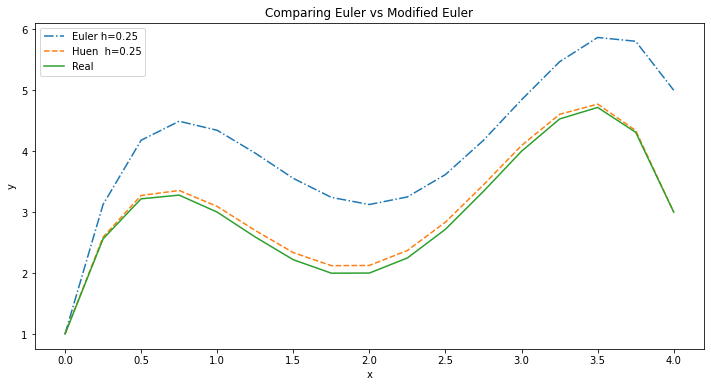

In [22]:
dy_dx = lambda x,y: -2*x**3 + 12*x**2 - 20*x +  8.5         # Differential equation
y_real = lambda x: -0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1 # Real Solution

ye,x= eulers_method_v2(dy_dx,yi=1,xi=0,a=0,b=4,h=0.25) # Euler Method
yh,x= huen_method_v2(dy_dx,yi=1,xi=0,a=0,b=4,h=0.25)   # Huen Method
y_real_vec = y_real(x)                                 # Evaluate in real solution 

### PLOT ###
plt.figure(figsize=(12,6))
plt.plot(x,ye,label="Euler h=0.25", linestyle="-.")
plt.plot(x,yh,label="Huen  h=0.25", linestyle="--")
plt.plot(x,y_real_vec,label="Real")

### Make Plot Pretty ###
plt.title("Comparing Euler vs Modified Euler")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## 3.- Runge-Kutta Methods of Higher order
The Runge-Kutta (RK) methods achieve the accuracy of the series procedure
Taylor without needing higher-order derivative calculus. There are many variants,
but they all have the generalized form of the equation:

$$ y_{i+1} = y_i + \phi(x_i,y_i,h) h $$

Where $\phi(x_i,y_i,h) $ is known as the increment function, which can be interpreted as
a representative slope in the interval. The increment function is written in the form
general like:

$$  \phi(x_i,y_i,h) = a_1k_1 + a_2k_2 + ... + a_nk_n$$

Where $a_i$ are constants and $k_i$ are:
<br>
$k1= f(x_i,y_i)$
<br>
$k2= f(x_i+p_1h,y_i+q_{11}k_1h)$
<br>
$k3= f(x_i+p_2h,y_i+q_{21}k_1h+q_{22}k_2h)$
<br>
$.$
<br>
$.$
<br>
$.$
<br>
$k_n=f(x_i+p_{n-1}h,y_i+q_{n-1,1}k_1h+q_{n-1,2}k_2h+...+q_{n-1,n-1}k_{n-1}h)$


Where the p's and q's are constant. Note that the k's are recurrence relationships. That is, $k1$ appears in equation $k2$, which appears in equation $k3$, and so on. How
each $k$ is a functional evaluation, this recurrence makes the RK methods efficient
for computer calculations.

It is possible to have several types of Runge-Kutta methods employing different
numbers of terms in the increment function specified by $n$. Note that the first-order Runge-Kutta (RK) method with $n = 1$ is, in fact, Euler's method.

Once $n$ is chosen, the $a$, $p$ and $q$ are evaluated by equating $ y_{i+1} = y_i + \phi(x_i,y_i,h) h $ to the terms in the Taylor series expansion.

## 3.1 Second-order Runge-Kutta methods
The second-order version of Eq. $ y_{i+1} = y_i + \phi(x_i,y_i,h) h $ is:

$$ y_{i+1} = y_i + (a_1k_1+a_2k_2) h $$
Where:
<br>
$k1= f(x_i,y_i)$
<br>
$k2= f(x_i+qh \;,\;y_i+qk_1h)$

With:
<br>
$a_1 = 1-a_2$
<br>
$q=\frac{1}{2}$

From this we have infinte Methods since $a_2$ could have any numerical value. There are three 
pricnipal methods that are used:

<br> Huen Method: $a_2= \frac{1}{2} \;\;\;$ $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$
 Raltson Method: $a_2= \frac{2}{3} $ $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$
 Middle Point Method $a_2= 1 $ 

$y_{i+1} = y_i + (k_1+ k_2) \frac{h}{2} $  $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$
$y_{i+1} = y_i + (\frac{1}{3}k_1+ \frac{2}{3}k_2) h $  $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$
$y_{i+1} = y_i + k_2h $
<br>
$k1= f(x_i,y_i)$  $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$
$k1= f(x_i,y_i)$   $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$
$k1= f(x_i,y_i)$
<br>
$k2= f(x_i+h \;,\;y_i+k_1h)$  $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$
$k2= f(x_i+\frac{3}{4}h \;,\;y_i+\frac{3}{4}k_1h)$ $\;\;\;\;\;\;\;\;\;\;\;\;\;\;$
$k2= f(x_i+\frac{h}{2} \;,\;y_i+k_1\frac{h}{2} )$

In [83]:
### We have solved this already so lets just change the variable names
### Optimize memory using numpy arrays ###
def huen_method_v3(dy_dx,yi,xi,a,b,h):
    """ Huen Method (AGAIN)"""
    vector_size = (b-a)/h + 1               # Create a constant to  generate a vector, add 1 extra step for initial condition
    x_vec = np.array([i*h for i in range(0,int(vector_size))])  # Create numpy array from 0  to number of vector size
    x_vec = x_vec + xi                                          # slide to xi 
    y_vec =  np.zeros((int(vector_size),))                      # Create a vector of zeros
    y_vec[0] = yi                                               # append initial condition of y
    
    ### Iterate over the vectors ###
    for i in range(0,int(vector_size)-1):  # -1 is needed because of i.c.                             
        k1 = dy_dx(x_vec[i],y_vec[i])      # Evaluate derivative in x[i] y[i] 
        y0_i1 = y_vec[i] +  k1*h           # First estimated based on huen point method
        x0_i1 =x_vec[i] + h                # Get the next point for x 
        k2 = dy_dx(x0_i1 ,y0_i1)           # Uses the estimation to calculate k2
       
        ### HUEN EVALUATION ###
        y_vec[i+1]= y_vec[i] + (k1  + k2)*h/2   # Get next y point and append it to y_vec
   
    return y_vec,x_vec

In [84]:
### Optimize memory using numpy arrays ###
def Raltson_method_v2(dy_dx,yi,xi,a,b,h):
    """ Raltson Method"""
    vector_size = (b-a)/h + 1               # Create a constant to  generate a vector, add 1 extra step for initial condition
    x_vec = np.array([i*h for i in range(0,int(vector_size))])  # Create numpy array from 0  to number of vector size
    x_vec = x_vec + xi                                          # slide to xi 
    y_vec =  np.zeros((int(vector_size),))                      # Create a vector of zeros
    y_vec[0] = yi                                               # append initial condition of y
    
    ### Iterate over the vectors ###
    for i in range(0,int(vector_size)-1):  # -1 is needed because of i.c.                                
        k1 = dy_dx(x_vec[i],y_vec[i])      # Evaluate derivative in x[i] y[i] 
        y0_i1 = y_vec[i] +  (3/4)*k1*h     # First estimated based on Raltson point method
        x0_i1 = x_vec[i]+(3/4)*h           # Get the next point for x 
        k2 = dy_dx(x0_i1,y0_i1)            # Uses the estimation to calculate future derivaitve

        ### RALtSON EVALUATION ##
        y_vec[i+1]= y_vec[i] + ( k1/3 + k2*(2/3) )*h  # Get next y point and append it to y_vec
   
    return y_vec,x_vec

In [85]:
### Optimize memory using numpy arrays ###
def Middle_method_v2(dy_dx,yi,xi,a,b,h):
    """ Middle Method"""
    vector_size = (b-a)/h + 1               # Create a constant to  generate a vector, add 1 extra step for initial condition
    x_vec = np.array([i*h for i in range(0,int(vector_size))])  # Create numpy array from 0  to number of vector size
    x_vec = x_vec + xi                                          # slide to xi 
    y_vec =  np.zeros((int(vector_size),))                      # Create a vector of zeros
    y_vec[0] = yi                                               # append initial condition of y
    
    ### Iterate over the vectors ###
    for i in range(0,int(vector_size)-1):    # -1 is needed because of i.c.                 
        k1 = dy_dx(x_vec[i],y_vec[i])        # Evaluate derivative in x[i] y[i]
        y0_i1 = y_vec[i] +  (h/2)*k1         # First estimated based on Middle point method
        x0_i1 = x_vec[i]+(1/2)*h             # Get the next point for x 
        k2 = dy_dx(x0_i1,y0_i1)              # Uses the estimation to calculate k2
        
        ### MIDDLE POINT EVALUATION ###
        y_vec[i+1]= y_vec[i] + k2*h          # Get next y point and append it to y_vec
                                                 
    return y_vec,x_vec

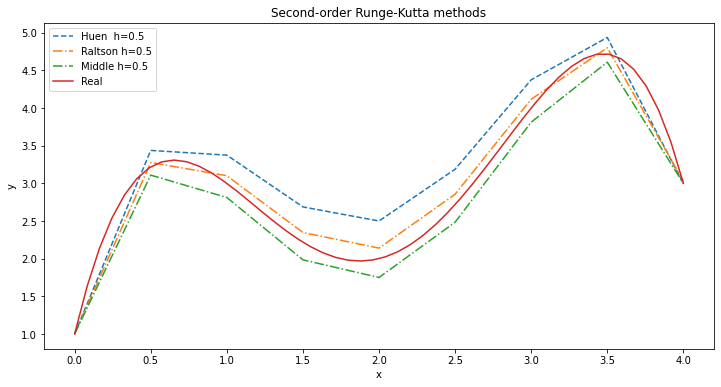

In [94]:
dy_dx = lambda x,y: -2*x**3 + 12*x**2 - 20*x +  8.5         # Differential equation
y_real = lambda x: -0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1 # Real Solution
y_h,x = huen_method_v3(dy_dx,yi=1,xi=0,a=0,b=4,h=0.5)
y_r,x = Raltson_method_v2(dy_dx,yi=1,xi=0,a=0,b=4,h=0.5)
y_m,x = Middle_method_v2(dy_dx,yi=1,xi=0,a=0,b=4,h=0.5)

### PLOT ###
plt.figure(figsize=(12,6))
plt.plot(x,y_h,label="Huen  h=0.5", linestyle="--")
plt.plot(x,y_r,label="Raltson h=0.5", linestyle="-.")
plt.plot(x,y_m,label="Middle h=0.5", linestyle="-.")
plt.plot(np.linspace(0,4,50),y_real(np.linspace(0,4,50)),label="Real")

### Make Plot Pretty ###
plt.title("Second-order Runge-Kutta methods")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## 3.2 Higher order Runge-Kutta Methods

####  THIRD ORDER

$$ y_{i+1} = y_i + \frac{1}{6}(k_1+4k_2+k_3)h $$

$k1= f(x_i,y_i)$
<br>
$k2= f(x_i+\frac{1}{2}h \;,\;y_i + \frac{1}{2}k_1h)$
<br>
$k3= f(x_i+ h \;,\;y_i-k_1h+2k_2h)$

In [95]:
### Optimize memory using numpy arrays ###
def RK_third_order(dy_dx,yi,xi,a,b,h):
    """ Raltson Method"""
    vector_size = (b-a)/h + 1               # Create a constant to  generate a vector, add 1 extra step for initial condition
    x_vec = np.array([i*h for i in range(0,int(vector_size))])  # Create numpy array from 0  to number of vector size
    x_vec = x_vec + xi                                          # slide to xi 
    y_vec =  np.zeros((int(vector_size),))                      # Create a vector of zeros
    y_vec[0] = yi                                               # append initial condition of y
    
    ### Iterate over the vectors ###
    for i in range(0,int(vector_size)-1):  # -1 is needed because of i.c.                                
        k1 = dy_dx(x_vec[i],y_vec[i])      # Evaluate derivative in x[i] y[i] 
        y0_i1 = y_vec[i] +  (1/2)*k1*h     # First estimated based on 3erd order method
        x0_i1 = x_vec[i]+(1/2)*h           # Get the next point for x 
        k2 = dy_dx(x0_i1,y0_i1)            # Uses the estimation to calculate future derivaitve
        y0_i2 = y_vec[i] - k1*h  + 2*k2*h  # Second estimated based on 3erd order method
        x0_i2 = x_vec[i] + h               # Get the next point for x 
        k3 = dy_dx(x0_i2,y0_i2)            # Uses the estimation to calculate future derivaitve
        
        ### RALtSON EVALUATION ##
        y_vec[i+1]= y_vec[i] + (1/6)*( k1 + 4*k2 +k3)*h  # Get next y point and append it to y_vec
   
    return y_vec,x_vec

####  FOURTH  ORDER

$$ y_{i+1} = y_i + \frac{1}{6}(k_1+2k_2+2k_3+k_4)h $$

$k1= f(x_i,y_i)$
<br>
$k2= f(x_i+\frac{1}{2}h \;,\;y_i + \frac{1}{2}k_1h)$
<br>
$k3= f(x_i+\frac{1}{2}h \;,\;y_i + \frac{1}{2}k_2h)$
<br>
$k4= f(x_i+ h \;,\;y_i+k_3h)$



In [98]:
### Optimize memory using numpy arrays ###
def RK_fourth_order(dy_dx,yi,xi,a,b,h):
    """ Raltson Method"""
    vector_size = (b-a)/h + 1               # Create a constant to  generate a vector, add 1 extra step for initial condition
    x_vec = np.array([i*h for i in range(0,int(vector_size))])  # Create numpy array from 0  to number of vector size
    x_vec = x_vec + xi                                          # slide to xi 
    y_vec =  np.zeros((int(vector_size),))                      # Create a vector of zeros
    y_vec[0] = yi                                               # append initial condition of y
    
    ### Iterate over the vectors ###
    for i in range(0,int(vector_size)-1):  # -1 is needed because of i.c.                                
        k1 = dy_dx(x_vec[i],y_vec[i])      # Evaluate derivative in x[i] y[i] 
        y0_i1 = y_vec[i] +  (1/2)*k1*h     # First estimated based on 4th order method
        x0_i1 = x_vec[i]+(1/2)*h           # Get the next point for x 
        k2 = dy_dx(x0_i1,y0_i1)            # Uses the estimation to calculate future derivaitve
        y0_i2 = y_vec[i] + (1/2)*k2*h      # Second estimated based on  4th order method
        x0_i2 = x_vec[i] + (1/2)*h         # Get the next point for x 
        k3 = dy_dx(x0_i2,y0_i2)            # Uses the estimation to calculate future derivaitve
        y0_i3 = y_vec[i] + k3*h            # Third estimated based on  4th order method
        x0_i3 = x_vec[i] + h               # Get the next point for x 
        k4 = dy_dx(x0_i3,y0_i3)            # Fourth estimated based on  4th order method
        
        ### RALtSON EVALUATION ##
        y_vec[i+1]= y_vec[i] + (1/6)*( k1 + 2*k2 + 2*k3 + k4)*h  
    return y_vec,x_vec

####  FITH ORDER (BUTCHER'S  METHOD)

$$ y_{i+1} = y_i + \frac{1}{90}(7k_1+32k_3+12k_4+32k_5+7k_6)h $$

$k1= f(x_i,y_i)$
<br>
$k2= f(x_i+\frac{1}{4}h \;,\;y_i + \frac{1}{4}k_1h)$
<br>
$k3= f(x_i+\frac{1}{4}h \;,\;y_i + \frac{1}{8}k_1h+ \frac{1}{8}k_2h)$
<br>
$k4= f(x_i+\frac{1}{2}h \;,\;y_i -\frac{1}{2}k_2h+k_3h)$
<br>
$k5= f(x_i+\frac{3}{4}h \;,\;y_i +\frac{3}{16}k_1h+ \frac{9}{16}k_4h)$
<br>
$k6= f(x_i+h \;,\;y_i -\frac{3}{7}k_1h + \frac{2}{7}k_2h + \frac{12}{7}k_3h - \frac{12}{7}k_4h +\frac{8}{7}k_5h )$

This last method returns extremmlly accuarate derivatives, but it has high computational  power.

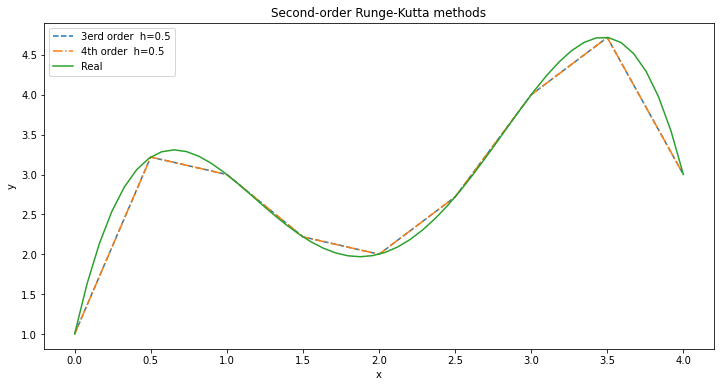

In [103]:
dy_dx = lambda x,y: -2*x**3 + 12*x**2 - 20*x +  8.5         # Differential equation
y_real = lambda x: -0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1 # Real Solution
y_3,x = RK_third_order(dy_dx,yi=1,xi=0,a=0,b=4,h=0.5)
y_4,x = RK_fourth_order(dy_dx,yi=1,xi=0,a=0,b=4,h=0.5)
### PLOT ###
plt.figure(figsize=(12,6))
plt.plot(x,y_3,label="3erd order  h=0.5", linestyle="--")
plt.plot(x,y_4,label="4th order  h=0.5", linestyle="-.")
#plt.plot(x,y_m,label="Middle h=0.5", linestyle="-.")
plt.plot(np.linspace(0,4,50),y_real(np.linspace(0,4,50)),label="Real")

### Make Plot Pretty ###
plt.title("Second-order Runge-Kutta methods")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()